In [123]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sys, os, importlib
from scipy.stats import gaussian_kde
import glob
from natsort import natsorted

# Reload modules to ensure the latest changes are picked up
sys.path.append(os.path.abspath("modules"))
import modules.gendata
importlib.reload(modules.gendata)
from modules.gendata import *

np.random.seed(99) # random noise

/tmp/ipykernel_88066/2948261020.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.12, 1, 1])  # Adjust layout to make room for the colorbar


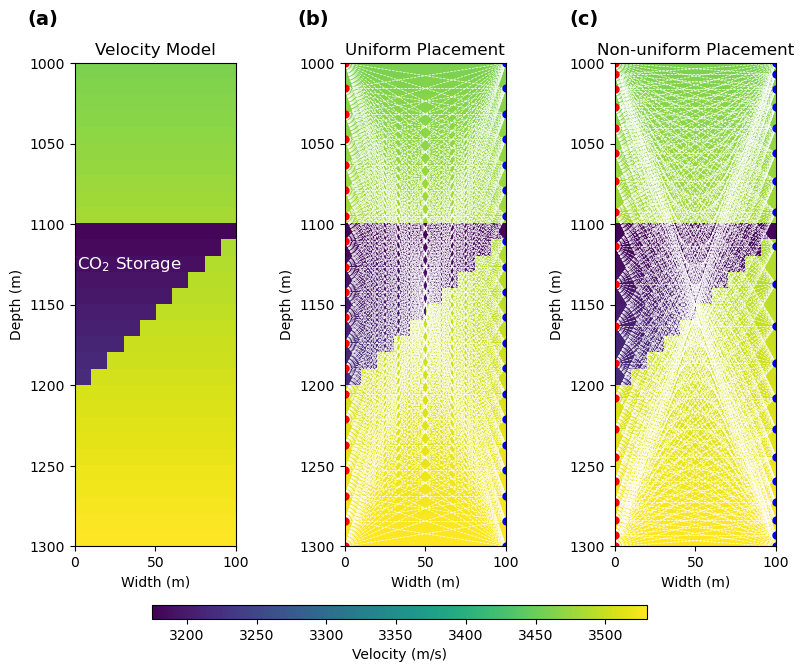

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Define functions
def plot_velocity_model(ax, velocity_model, extent):
    cax = ax.imshow(velocity_model, cmap='viridis', interpolation='nearest', extent=extent, origin='upper', vmin=3175, vmax=3530)
    ax.set_xlabel('Width (m)')
    ax.set_ylabel('Depth (m)')
    return cax

def plot_velocity_model_with_sources_and_receivers(ax, velocity_model, sources, receivers, extent, showlines, linecolor, linewidth):
    cax = ax.imshow(velocity_model, cmap='viridis', interpolation='nearest', extent=extent, origin='upper', vmin=3175, vmax=3530)
    ax.set_xlabel('Width (m)')
    ax.set_ylabel('Depth (m)')
    
    # Plot lines between sources and receivers
    if showlines:
        for source in sources:
            for receiver in receivers:
                ax.plot([source[0], receiver[0]], [source[1], receiver[1]], color=linecolor, linestyle='--', linewidth=linewidth)

    # Plot the sources and receivers
    for source in sources:
        ax.plot(source[0], source[1], marker='o', color='red', markersize=5)

    for receiver in receivers:
        ax.plot(receiver[0], receiver[1], marker='o', color='blue', markersize=5)
    
    return cax

# # Define the velocity model generator
# def velocity_generator(rows, cols):
#     return np.random.uniform(3175, 3530, size=(rows, cols))

# # Define the device locations
# def device_location(n, rows, new_min, new_max, linear=True):
#     if linear:
#         return np.linspace(new_min, new_max, n)
#     else:
#         return np.sort(np.random.uniform(new_min, new_max, size=n))

# Define the velocity model
rows, cols = 30, 10
grid_size = (rows, cols)
velocity_model = velocity_generator(rows, cols)

# Define the extent
extent = [0, 100, 1300, 1000]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(11/4*3, 7))  # Adjust to 3 subplots

# First plot (without sources and receivers)
cax1 = plot_velocity_model(axs[0], velocity_model, extent)
axs[0].set_title('Velocity Model')

# Add "CO₂ Storage" text in the left middle of the first figure
axs[0].text(34, 1125, 'CO$_2$ Storage', fontsize=12, color='white', verticalalignment='center', horizontalalignment='center')

# Second plot
z = device_location(n=20, rows=rows, new_min=extent[2], new_max=extent[3], linear=True)
sources = [(extent[0], i) for i in z]
receivers = [(extent[1], i) for i in z]
cax2 = plot_velocity_model_with_sources_and_receivers(axs[1], velocity_model, sources, receivers, extent, showlines=True, linecolor='white', linewidth=.5)
axs[1].set_title('Uniform Placement')

# Third plot
z = device_location(n=20, rows=rows, new_min=extent[2], new_max=extent[3], linear=False)
sources = [(extent[0], i) for i in z]
receivers = [(extent[1], i) for i in z]
cax3 = plot_velocity_model_with_sources_and_receivers(axs[2], velocity_model, sources, receivers, extent, showlines=True, linecolor='white', linewidth=.5)
axs[2].set_title('Non-uniform Placement')

# Add labels "a", "b", and "c" to the subplots
axs[0].text(-0.1, 1.11, '(a)', transform=axs[0].transAxes, fontsize=14, va='top', ha='right', fontweight='bold')
axs[1].text(-0.1, 1.11, '(b)', transform=axs[1].transAxes, fontsize=14, va='top', ha='right', fontweight='bold')
axs[2].text(-0.1, 1.11, '(c)', transform=axs[2].transAxes, fontsize=14, va='top', ha='right', fontweight='bold')

# Add a single colorbar for all subplots at the bottom
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])  # Define a new colorbar axis [left, bottom, width, height]
cbar = fig.colorbar(cax1, cax=cbar_ax, orientation='horizontal')  # Attach the colorbar to the custom axis
cbar.set_label('Velocity (m/s)')  # Set the label for the colorbar

plt.tight_layout(rect=[0, 0.12, 1, 1])  # Adjust layout to make room for the colorbar
plt.show()
fig.savefig('plots/ray_coverage.pdf', bbox_inches='tight')  # Save with desired DPI and tight bounding box


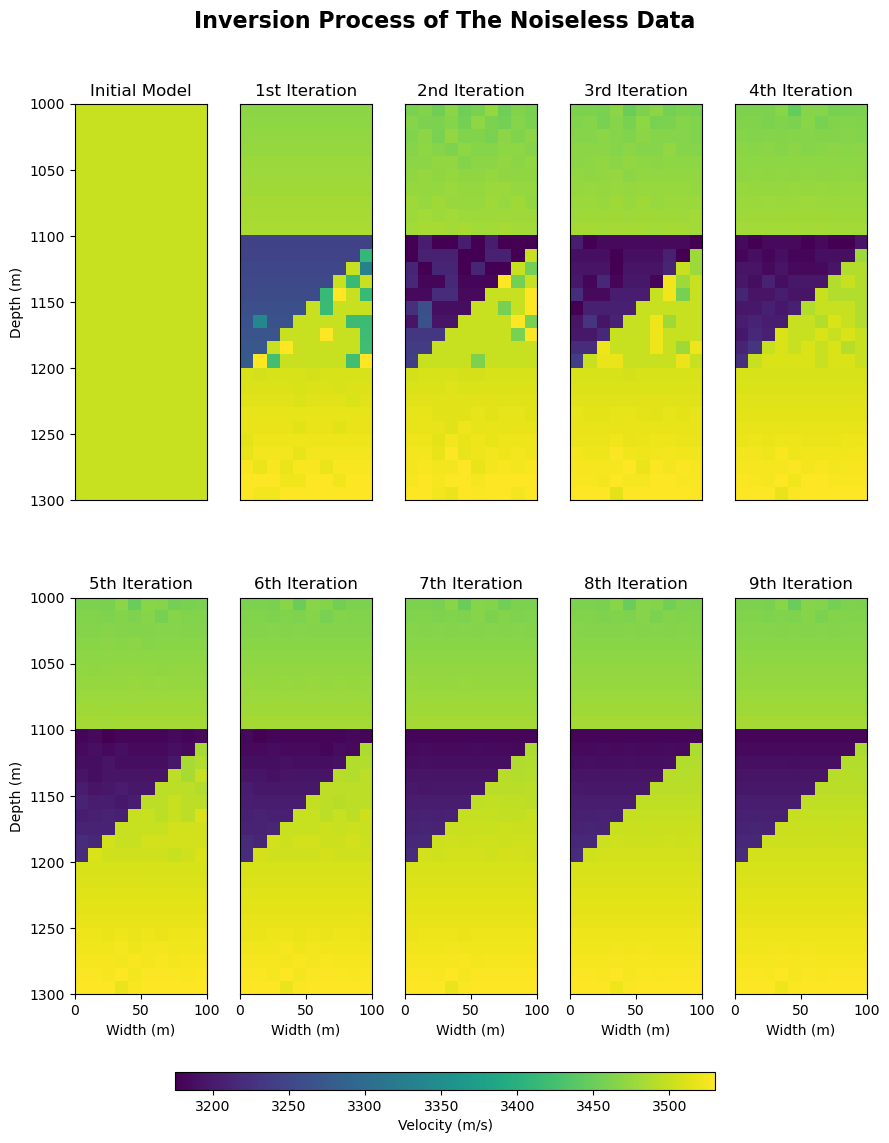

In [125]:
# Base directory where the folders are located
base_directory = 'results30x10'

# Use glob to find all .txt files in the directory and subdirectories
file_paths = glob.glob(f'{base_directory}/*/*.txt', recursive=True)
file_paths = natsorted(file_paths)

# Function to read all .txt files
def read_all_txt_files(file_paths):
    data = []
    for file_path in file_paths:
        file_data = np.loadtxt(file_path)
        data.append(file_data)
    return data

# Read all .txt files and store their content
s = np.array(read_all_txt_files(file_paths))

data = [s[i::10] for i in range(10)]
data = np.array(data)
velocity_inversion = 1 / data

# Helper function to create ordinal labels
def ordinal(n):
    return "%d%s" % (n, "tsnrhtdd"[(n // 10 % 10 != 1) * (n % 10 < 4) * n % 10::4])

# Create a 2x5 grid to display the matrices using imshow
cols = 5  # Number of columns
rows = 2  # Number of rows

fig, axes = plt.subplots(rows, cols, figsize=(9, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

vmin, vmax = 3175, 3530
extent = [0, 100, 1300, 1000]  # Set the desired extent

velocity_initial = np.full((30, 10), 3500)

# Loop through each matrix and plot
for i in range(10):
    if i == 0:
        # Plot the initial velocity for the first subplot
        im = axes[i].imshow(velocity_initial, cmap='viridis', vmin=vmin, vmax=vmax, extent=extent)
        axes[i].set_title('Initial Model')
    else:
        # Plot the inverted velocity models from 1 to 9
        im = axes[i].imshow(velocity_inversion[i-1], cmap='viridis', vmin=vmin, vmax=vmax, extent=extent)
        axes[i].set_title(f'{ordinal(i)} Iteration')

    # Set custom labels for specific subplots
    if i == 0:
        axes[i].set_ylabel('Depth (m)')
        axes[i].set_xticks([])
    elif i == 5:
        axes[i].set_xlabel('Width (m)')
        axes[i].set_ylabel('Depth (m)')
    elif i >= 6:
        axes[i].set_xlabel('Width (m)')
        axes[i].set_yticks([])
    else:
        axes[i].set_xticks([])
        axes[i].set_yticks([])

# Adjust the layout to make room for the colorbar at the bottom
fig.tight_layout(rect=[0, 0.1, 1, 0.95], h_pad=3.0)  # Increase h_pad to add more space between rows

# Add a single colorbar for all subplots at the bottom
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Velocity (m/s)')

# Add a title for the entire plot
fig.suptitle('Inversion Process of The Noiseless Data', fontsize=16, fontweight='bold')

plt.show()
fig.savefig('plots/result10loops.pdf', bbox_inches='tight')  # Save with desired DPI and tight bounding box


/tmp/ipykernel_88066/3576515136.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make room for the colorbars


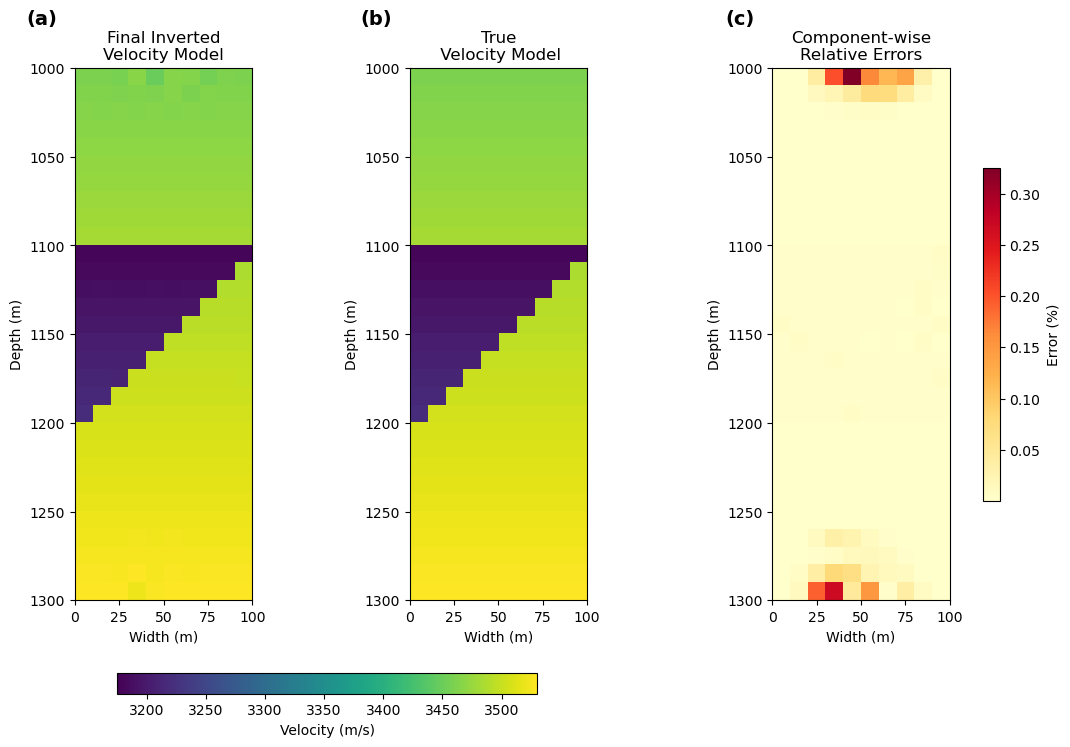

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Define models
rows, cols = 30, 10
grid_size = (rows, cols)
min_velocity = 3460
max_velocity = 3530
wedge_min_velocity = 3180
wedge_max_velocity = 3220
wedge_start_row = 10
wedge_end_row = 20

# Create a background velocity model with values ranging from 3460 to 3530
velocity_model = np.linspace(min_velocity, max_velocity, rows).reshape(-1, 1)
velocity_model = np.repeat(velocity_model, cols, axis=1)
velocity_initial = np.full((30, 10), 3500)

# Create a triangular wedge shape with vertices at (0, 10), (0, 20), and (10, 10)
for i in range(wedge_start_row, wedge_end_row):
    row_velocity = np.linspace(wedge_min_velocity, wedge_max_velocity, wedge_end_row - wedge_start_row)[i - wedge_start_row]
    num_cols_in_wedge = wedge_end_row - i
    velocity_model[i, :num_cols_in_wedge] = row_velocity

# Define the extent
extent = [0, 100, 1300, 1000]

# Create the 1x3 grid layout
fig, axs = plt.subplots(1, 3, figsize=(11, 7))

# Second plot: Inverted Velocity
im1 = axs[0].imshow(velocity_inversion[9], cmap='viridis', interpolation='nearest', extent=extent, origin='upper', vmin=vmin, vmax=vmax)
axs[0].set_title('Final Inverted\nVelocity Model')
axs[0].set_xlabel('Width (m)')
axs[0].set_ylabel('Depth (m)')

# Third plot: Velocity Model
im2 = axs[1].imshow(velocity_model, cmap='viridis', interpolation='nearest', extent=extent, origin='upper', vmin=vmin, vmax=vmax)
axs[1].set_title('True\n Velocity Model')
axs[1].set_xlabel('Width (m)')
axs[1].set_ylabel('Depth (m)')

# Fourth plot: Difference
relative_error = np.abs((velocity_model - velocity_inversion[9]) / velocity_model)
im3 = axs[2].imshow(relative_error*100, cmap='YlOrRd', interpolation='nearest', extent=extent, origin='upper')
axs[2].set_title('Component-wise\nRelative Errors')
axs[2].set_xlabel('Width (m)')
axs[2].set_ylabel('Depth (m)')

# Add a single colorbar for the first two subplots
cbar1 = fig.colorbar(im1, ax=axs[:2], orientation='horizontal', fraction=0.05, pad=0.2)
cbar1.ax.set_position([-0.03, 0.00, 0.7, 0.03])  # [left, bottom, width, height]
cbar1.set_label('Velocity (m/s)')

# Add a separate vertical colorbar for the third subplot
cbar2 = fig.colorbar(im3, ax=axs[2], orientation='vertical', fraction=0.05, pad=0.1)
cbar2.set_label('Error (%)')

# Add labels "a", "b", and "c" to the subplots
axs[0].text(-0.1, 1.11, '(a)', transform=axs[0].transAxes, fontsize=14, va='top', ha='right', fontweight='bold')
axs[1].text(-0.1, 1.11, '(b)', transform=axs[1].transAxes, fontsize=14, va='top', ha='right', fontweight='bold')
axs[2].text(-0.1, 1.11, '(c)', transform=axs[2].transAxes, fontsize=14, va='top', ha='right', fontweight='bold')

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make room for the colorbars
plt.show()
fig.savefig('plots/result_diff.pdf', bbox_inches='tight')  # Save with desired DPI and tight bounding box


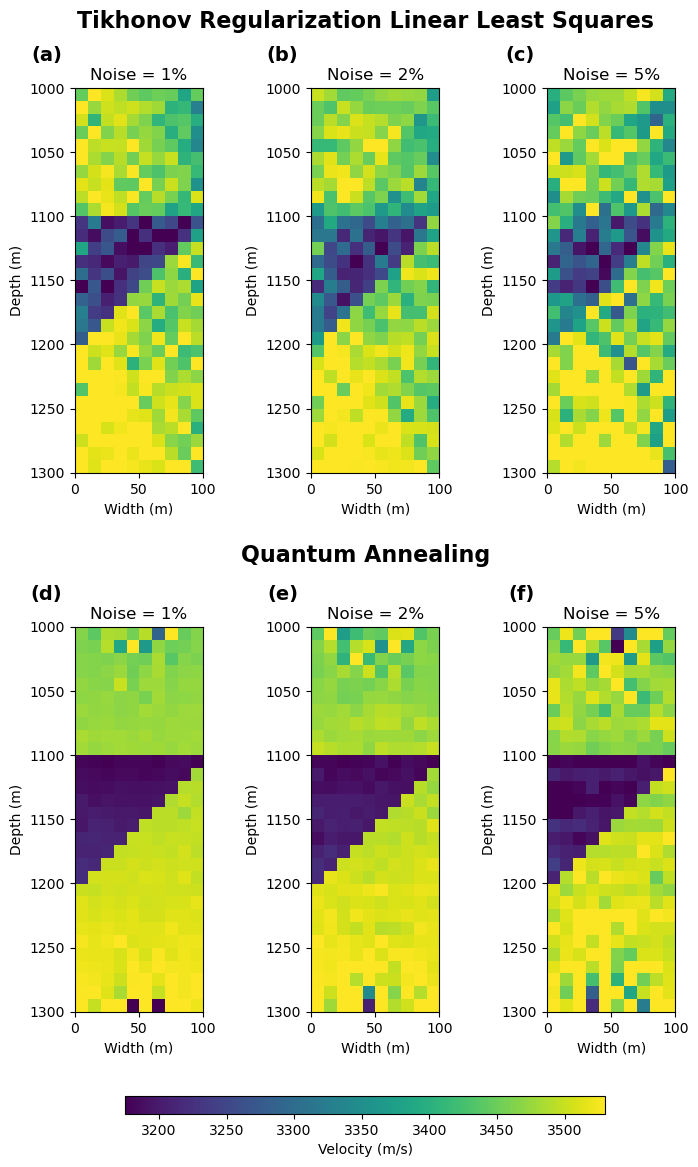

In [127]:
import matplotlib.gridspec as gridspec


# Base directories where the folders are located
# base_directories = ['results30x10-noise-001', 'results-noise-1', 'results30x10-noise-1']
base_directories = [ 'results-noise-1-constantL', 'results-noise-2-constantL', 'results-noise-5-constantL']
# List to store velocity inversion data
velocity_inversions_quantum = []

# Iterate over each base directory
for base_directory in base_directories:
    # Use glob to find all .txt files in the directory and subdirectories
    file_paths = glob.glob(f'{base_directory}/*/*.txt', recursive=True)
    file_paths = natsorted(file_paths)

    # Read all .txt files and store their content
    s = np.array([np.loadtxt(file_path) for file_path in file_paths])
    data = np.array([s[i::10] for i in range(10)])
    velocity_inversions_quantum.append(1 / data)


# tikhonov_folder = './results-tikhonov'
tikhonov_files = glob.glob('./results-tikhonov/*')
tikhonov_files = natsorted(tikhonov_files)

velocity_inversions = []
for file in tikhonov_files:
    velocity_inversions.append(np.loadtxt(file))


# Create a 2x3 grid of subplots with more space between the rows
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], hspace=0.4, wspace=0.6)

# Titles for each subplot
titles = ['Noise = 1%', 'Noise = 2%', 'Noise = 5%']

# Plot the velocity inversion for the classical noise data (Linear Least Squares) first
main_axes = []  # To store main plot axes
for i, (velocity_inversion, title) in enumerate(zip(velocity_inversions, titles)):
    ax = fig.add_subplot(gs[0, i])
    main_axes.append(ax)
    im = ax.imshow(velocity_inversion, cmap='viridis', extent=extent, vmin=vmin, vmax=vmax)
    ax.set_title(f'{title}')
    ax.set_xlabel('Width (m)')
    ax.set_ylabel('Depth (m)')
    # fig.colorbar(im, ax=ax, fraction=0.5, pad=0.04)

# Plot the velocity inversion for freenoise data (Quantum Annealing) next
for i, (velocity_inversion, title) in enumerate(zip(velocity_inversions_quantum, titles)):
    ax = fig.add_subplot(gs[1, i])
    main_axes.append(ax)
    im = ax.imshow(velocity_inversion[9], cmap='viridis', extent=extent, vmin=vmin, vmax=vmax)
    ax.set_title(f'{title}')
    ax.set_xlabel('Width (m)')
    ax.set_ylabel('Depth (m)')
    # fig.colorbar(im, ax=ax, fraction=0.5, pad=0.04)

# Add labels to the main subplots only
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(main_axes):
    ax.text(-0.1, 1.11, labels[i], transform=ax.transAxes, fontsize=14, va='top', ha='right', fontweight='bold')

# Add overarching titles for the rows
fig.text(0.5, 0.93, 'Tikhonov Regularization Linear Least Squares', ha='center', fontsize=16, fontweight='bold')
fig.text(0.5, 0.485, 'Quantum Annealing', ha='center', fontsize=16, fontweight='bold')

# Add a single colorbar below the figure
cbar_ax = fig.add_axes([0.2, 0.025, 0.6, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Velocity (m/s)')

# Save the figure
plt.savefig('plots/combined_velocity_inversions.pdf', bbox_inches='tight')
plt.show()
